In [129]:
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2

OpenCV gabor kernel
===
---
Returns Gabor filter coefficients.<br/>
For more details about gabor filter equations and parameters, see: Gabor Filter.<br/><br/>

#### Parameters
    - ksize	Size of the filter returned.
    - sigma	Standard deviation of the gaussian envelope.
    - theta	Orientation of the normal to the parallel stripes of a Gabor function.
    - lambd	Wavelength of the sinusoidal factor.
    - gamma	Spatial aspect ratio.
    - psi	Phase offset.  (psi=CV_PI*0.5)
    - ktype	Type of filter coefficients. It can be CV_32F or CV_64F.  (ktype = CV_64F)

cv.getGaborKernel(	ksize, sigma, theta, lambd, gamma[, psi[, ktype]]	)

---
##### 출처 : OpenCV documantation<br/>https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gae84c92d248183bd92fa713ce51cc3599

In [51]:
pi = np.pi
gabor = cv2.getGaborKernel((3,3),pi,pi,pi,pi)
gabor

array([[ 5.24272533e-01, -9.75375692e-17, -5.24272533e-01],
       [ 8.64379277e-01,  6.12323400e-17, -8.64379277e-01],
       [ 5.24272533e-01,  1.71816152e-16, -5.24272533e-01]])

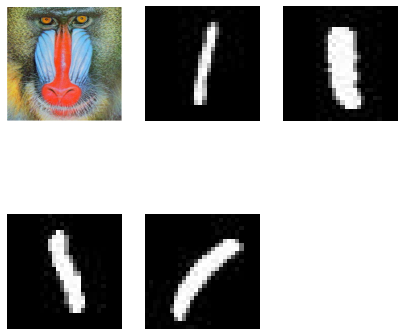

In [155]:
im_path = "./images/*.jpg"

def im_pro(file):
    im = cv2.imread(file)
    b,g,r = cv2.split(im)
    return cv2.merge([r,g,b])

ims = np.array([im_pro(file) for file in glob.glob(im_path)])

plt.figure(figsize=(7,7))
for i in range(len(ims)):
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(ims[i])
plt.show()

In [187]:
def conv(data,kernel_size=3):
    kernel_side = kernel_size//2
    kernel = [[-1 for j in range(kernel_size)] for i in range(kernel_size)]
    kernel[kernel_side+1][kernel_side+1] = kernel_size**2-1
    
    conved_data = np.zeros((np.shape(data)[0]-kernel_side,np.shape(data)[1]-kernel_side))
    print(np.shape(conved_data))
    for r in range(kernel_side,np.shape(data)[0]-kernel_side):
        for c in range(kernel_side,np.shape(data)[1]-kernel_side):
            conved_data[r-kernel_side][c-kernel_side] = np.sum(data[r-kernel_side:r+kernel_side+1, c-kernel_side:c+kernel_side+1]*kernel)
    return conved_data

(28, 28, 3)
(28, 28)


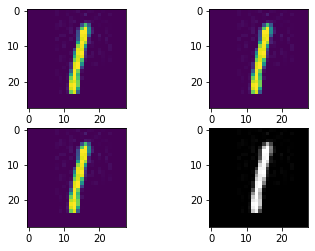

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]
(27, 27)
(27, 27)
(27, 27)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


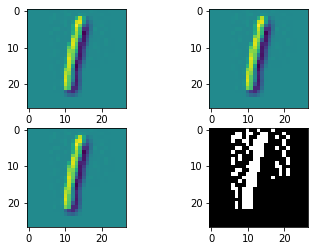

In [190]:
data = ims[1]
print(np.shape(data))
r,g,b = cv2.split(data)
#data = data.reshape((3,28,28))
print(np.shape(b))
plt.subplot(2,2,1)
plt.imshow(r)
plt.subplot(2,2,2)
plt.imshow(g)
plt.subplot(2,2,3)
plt.imshow(b)
plt.subplot(2,2,4)
plt.imshow(cv2.merge([r,g,b]))
plt.show()

kernel_size=3
kernel_side = kernel_size//2
kernel = np.array([[-1 for j in range(kernel_size)] for i in range(kernel_size)])
kernel[kernel_size//2][kernel_size//2] = kernel_size**2
print(kernel)
'''
kernel_size=3
kernel_side = kernel_size//2
kernel = np.array([[-1+i*1 for j in range(kernel_size)] for i in range(kernel_size)])
print(kernel)
'''
'''
conved_data = []
for r in range(kernel_side,np.shape(data)[0]-kernel_side):
    conved_data.append([])
    for c in range(kernel_side,np.shape(data)[1]-kernel_side):
        conved_data[r-kernel_side].append(np.sum(data[r-kernel_side:r+kernel_side+1, c-kernel_side:c+kernel_side+1]*kernel))
'''
conved_r = conv(r)
conved_g = conv(g)
conved_b = conv(b)


plt.subplot(2,2,1)
plt.imshow(conved_r)
plt.subplot(2,2,2)
plt.imshow(conved_g)
plt.subplot(2,2,3)
plt.imshow(conved_b)
plt.subplot(2,2,4)
plt.imshow(cv2.merge([conved_r,conved_g,conved_b]))
plt.show()